## Оглавление:
* [Шаг 1. Откройте файл](#first-bullet)
* [Шаг 2. Предобработка данных](#second-bullet)
* [Шаг 3. Проанализируйте данные](#third-bullet)
* [Шаг 4. Проверьте гипотезы](#fourth-bullet)
* [Шаг 5. Общий вывод](#fifth-bullet)

# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a name="first-bullet"></a>

In [1]:
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [2]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [3]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [8]:
calls.query('user_id == "1489"').head(20)

,id,call_date,duration,user_id


In [9]:
messages.query('user_id == "1489"').head(10)

,id,message_date,user_id
120653,1489_0,2018-12-19,1489
120654,1489_1,2018-10-16,1489
120655,1489_2,2018-12-07,1489
120656,1489_3,2018-11-15,1489
120657,1489_4,2018-12-01,1489
120658,1489_5,2018-09-11,1489
120659,1489_6,2018-10-11,1489
120660,1489_7,2018-09-08,1489
120661,1489_8,2018-10-01,1489
120662,1489_9,2018-08-22,1489


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [12]:
internet.query('user_id == "1489"').head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
145991,145991,1489_0,284.63,2018-10-10,1489
145992,145992,1489_1,409.13,2018-08-18,1489
145993,145993,1489_2,672.41,2018-12-09,1489
145994,145994,1489_3,154.32,2018-09-03,1489
145995,145995,1489_4,404.42,2018-10-10,1489


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


У нас есть пять таблиц:
* tariffs - информация о двух тарифах;
* users - информация о 500 пользователях, в которой есть пропуски в столбце с датой отказа от тарифа, у тех пользователей, которые не меняли тариф;
* calls - информация о каждом звонке выбранных пользователей, состоящая из 202607 строк;
* messages - информация об отправках смс, содержит из 123036 строк;
* internet - информация о выходах в интернет и количестве использованных Мб, состоит из 149396 строк.


Каждая таблица содержит id пользователя и даты пользования услугами.

### Шаг 2. Предобработка данных <a name="second-bullet"></a>

Все даты имеют тип "объект", переведем их в формат даты.

In [14]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

В таблице с интернет трафиком столбец 'Unnamed: 0' дублирует индексы, смысла в нем нет, поэтому уберем его

In [15]:
internet = internet.drop('Unnamed: 0', axis=1)
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [16]:
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
17,1017,73,NaT,Краснодар,Мария,Аленникова,2018-05-22,smart
310,1310,28,NaT,Уфа,Рудольф,Нестеров,2018-03-22,ultra
398,1398,58,NaT,Махачкала,Рауль,Ахмедов,2018-12-06,smart
37,1037,73,NaT,Череповец,Изольда,Архипова,2018-10-13,smart
326,1326,37,NaT,Санкт-Петербург,Леонид,Барсуков,2018-05-29,smart
237,1237,43,NaT,Москва,Алина,Кошелева,2018-11-04,smart
339,1339,52,NaT,Москва,Григорий,Вишневский,2018-08-14,smart
212,1212,21,NaT,Саранск,Руслан,Пономарев,2018-11-09,smart
106,1106,67,NaT,Калуга,Исаак,Костин,2018-04-26,ultra
392,1392,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra


In [17]:
calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [18]:
messages['user_id'].value_counts()

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

In [19]:
internet['user_id'].value_counts()

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

Разное количество уникальных пользователей в таблицах говорит о том, что не все юзеры пользуются всеми возможностями связи.

В таблице users выделим месяц регистрации и ухода с тарифа. Проверим бывает ли такое, что человек в один и тот же месяц пришел и ушел.

In [20]:
users['reg_month'] = users['reg_date'].dt.month
users['churn_month'] = users['churn_date'].dt.month
users.query('reg_month == churn_month')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12.0
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,12.0


In [21]:
calls.query('user_id == 1371')

,id,call_date,duration,user_id


In [22]:
messages.query('user_id == 1371')

,id,message_date,user_id


In [23]:
internet.query('user_id == 1371')

,id,mb_used,session_date,user_id


Данных этих пользователей нет в других таблицах, поэтому удалим их.

In [24]:
users = users.drop([128,371]).reset_index()
users

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,NaN
1,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,NaN
2,2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,NaN
3,3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,NaN
4,4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
493,495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8,NaN
494,496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,1,NaN
495,497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,10,NaN
496,498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10.0


Выделим в отдельный столбец месяц пользования услугой в таблицах calls, messages, internet. 

In [25]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


Округлим продолжительность каждого звонка и количество мб до целых чисел, как принято в Мегалайн, в бОльшую сторону.

In [26]:
calls['duration'] = calls['duration'].apply(np.ceil) 
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


In [27]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil) 
internet

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,319.0,2018-10-03,1499,10
149392,1499_153,491.0,2018-12-14,1499,12
149393,1499_154,0.0,2018-10-27,1499,10
149394,1499_155,1247.0,2018-11-26,1499,11


В звонках и интернет трафике встречаются нулевые значения. В данном случае это все же реальные значения, поэтому заменять их не стоит. 

In [28]:
calls['duration'].sum()

1450301.0

Объединим все звонки каждого пользователя по месяцам. Для удобства переименуем столбцы в соответствии с их новым собдержанием.

In [29]:
calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration': 'minutes_used', 'id': 'count_calls'})
calls

,user_id,month,minutes_used,count_calls
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
...,...,...,...,...
3169,1498,10,247.0,41
3170,1499,9,70.0,9
3171,1499,10,449.0,68
3172,1499,11,612.0,74


In [30]:
calls['minutes_used'].sum()

1450301.0

In [31]:
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [32]:
messages['id'].count()

123036

Сгруппируем таблицу messages по пользователям и месяцам, и посчитаем количество отправленных сообщений за месяц.

In [33]:
messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id': 'count_message'})
messages

,user_id,month,count_message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [34]:
messages['count_message'].sum()

123036

In [35]:
internet.sample(5)

,id,mb_used,session_date,user_id,month
54684,1183_215,275.0,2018-10-25,1183,10
70774,1240_442,678.0,2018-12-24,1240,12
8079,1027_406,0.0,2018-04-15,1027,4
101143,1339_122,535.0,2018-09-28,1339,9
57439,1192_0,638.0,2018-12-31,1192,12


In [36]:
internet['mb_used'].sum()

55369459.0

Объединим потраченные мегабайты по месяцам для каждого пользователям.

In [37]:
internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()
internet

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3198,1498,10,20604.0
3199,1499,9,1848.0
3200,1499,10,17809.0
3201,1499,11,17984.0


In [38]:
internet['mb_used'].sum()

55369459.0

Соберем все данные в одну таблицу по общим столбцам.

In [39]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [40]:
df = calls.merge(messages, on=['user_id', 'month'], how='outer')
df = df.merge(internet, on=['user_id', 'month'], how='outer')
df = df.merge(users, on='user_id', how='outer')
df = df.merge(tariffs, on='tariff', how='outer')
df.sample(10)

,user_id,month,minutes_used,count_calls,count_message,mb_used,index,age,churn_date,city,...,tariff,reg_month,churn_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1414,1093,9,825.0,106.0,72.0,12986.0,93,73,NaT,Санкт-Петербург,...,smart,6,NaN,50,15360,500,550,200,3,3
1066,1014,9,250.0,33.0,48.0,25773.0,14,64,NaT,Чебоксары,...,smart,5,NaN,50,15360,500,550,200,3,3
1034,1009,10,213.0,28.0,15.0,20112.0,9,24,NaT,Пермь,...,smart,3,NaN,50,15360,500,550,200,3,3
2770,1407,9,242.0,40.0,37.0,13960.0,407,40,NaT,Челябинск,...,smart,8,NaN,50,15360,500,550,200,3,3
1792,1175,7,366.0,50.0,NaN,13518.0,175,22,NaT,Москва,...,smart,4,NaN,50,15360,500,550,200,3,3
2499,1332,9,396.0,53.0,34.0,17403.0,332,23,NaT,Москва,...,smart,5,NaN,50,15360,500,550,200,3,3
2108,1242,11,192.0,28.0,NaN,4935.0,242,39,2018-12-21,Хабаровск,...,smart,11,12.0,50,15360,500,550,200,3,3
674,1375,2,919.0,125.0,59.0,11753.0,375,53,NaT,Пенза,...,ultra,1,NaN,1000,30720,3000,1950,150,1,1
3005,1456,11,889.0,112.0,NaN,28037.0,456,40,NaT,Санкт-Петербург,...,smart,8,NaN,50,15360,500,550,200,3,3
831,1436,4,314.0,51.0,22.0,24963.0,436,75,NaT,Москва,...,ultra,4,NaN,1000,30720,3000,1950,150,1,1


Проверим данные на наличие дубликатов и соответствие итоговых сумм в начальных таблицах и объединенной.

In [41]:
df.duplicated().sum()

0

In [42]:
calls['minutes_used'].sum()

1450301.0

In [43]:
df['minutes_used'].sum()

1450301.0

In [44]:
messages['count_message'].sum()

123036

In [45]:
df['count_message'].sum()

123036.0

In [46]:
internet['mb_used'].sum()

55369459.0

In [47]:
df['mb_used'].sum()

55369459.0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 23 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
minutes_used             3174 non-null float64
count_calls              3174 non-null float64
count_message            2717 non-null float64
mb_used                  3203 non-null float64
index                    3214 non-null int64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
reg_month                3214 non-null int64
churn_month              187 non-null float64
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_mont

Посчитаем превышение использованных минут, сообщений и мегабайт над предоставленными по тарифу пакетами услуг.

In [49]:
df['minutes_overrun']  = df['minutes_used'] - df['minutes_included']
df['messages_overrun'] = df['count_message'] - df['messages_included']
df['mb_overrun']  = df['mb_used'] - df['mb_per_month_included'] 
df

,user_id,month,minutes_used,count_calls,count_message,mb_used,index,age,churn_date,city,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_overrun
0,1000,5,159.0,22.0,22.0,2256.0,0,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,-28464.0
1,1000,6,172.0,43.0,60.0,23257.0,0,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,-7463.0
2,1000,7,340.0,47.0,75.0,14016.0,0,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,-16704.0
3,1000,8,408.0,52.0,81.0,14070.0,0,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,-16650.0
4,1000,9,466.0,58.0,57.0,14581.0,0,52,NaT,Краснодар,...,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,-16139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,17.0,11066.0,489,35,NaT,Санкт-Петербург,...,50,15360,500,550,200,3,3,NaN,-33.0,-4294.0
3210,1489,9,NaN,NaN,32.0,17232.0,489,35,NaT,Санкт-Петербург,...,50,15360,500,550,200,3,3,NaN,-18.0,1872.0
3211,1489,10,NaN,NaN,21.0,19588.0,489,35,NaT,Санкт-Петербург,...,50,15360,500,550,200,3,3,NaN,-29.0,4228.0
3212,1489,11,NaN,NaN,20.0,17516.0,489,35,NaT,Санкт-Петербург,...,50,15360,500,550,200,3,3,NaN,-30.0,2156.0


Рассчитаем помесячную выручку по каждому пользователю.

In [50]:
def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0    
    if row['minutes_overrun'] > 0:
        revenue_by_min = row['minutes_overrun'] * row['rub_per_minute']    
    if row['messages_overrun'] > 0:
        revenue_by_messages = row['messages_overrun'] * row['rub_per_message']    
    if row['mb_overrun'] > 0:
        revenue_mb = (row['mb_overrun'] / 1024) * row['rub_per_gb']    
    return revenue_by_min + revenue_by_messages + revenue_mb

df['revenue'] = df.apply(get_revenue, axis = 1) + df['rub_monthly_fee']
df

,user_id,month,minutes_used,count_calls,count_message,mb_used,index,age,churn_date,city,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_overrun,revenue
0,1000,5,159.0,22.0,22.0,2256.0,0,52,NaT,Краснодар,...,30720,3000,1950,150,1,1,-2841.0,-978.0,-28464.0,1950.000000
1,1000,6,172.0,43.0,60.0,23257.0,0,52,NaT,Краснодар,...,30720,3000,1950,150,1,1,-2828.0,-940.0,-7463.0,1950.000000
2,1000,7,340.0,47.0,75.0,14016.0,0,52,NaT,Краснодар,...,30720,3000,1950,150,1,1,-2660.0,-925.0,-16704.0,1950.000000
3,1000,8,408.0,52.0,81.0,14070.0,0,52,NaT,Краснодар,...,30720,3000,1950,150,1,1,-2592.0,-919.0,-16650.0,1950.000000
4,1000,9,466.0,58.0,57.0,14581.0,0,52,NaT,Краснодар,...,30720,3000,1950,150,1,1,-2534.0,-943.0,-16139.0,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,17.0,11066.0,489,35,NaT,Санкт-Петербург,...,15360,500,550,200,3,3,NaN,-33.0,-4294.0,550.000000
3210,1489,9,NaN,NaN,32.0,17232.0,489,35,NaT,Санкт-Петербург,...,15360,500,550,200,3,3,NaN,-18.0,1872.0,915.625000
3211,1489,10,NaN,NaN,21.0,19588.0,489,35,NaT,Санкт-Петербург,...,15360,500,550,200,3,3,NaN,-29.0,4228.0,1375.781250
3212,1489,11,NaN,NaN,20.0,17516.0,489,35,NaT,Санкт-Петербург,...,15360,500,550,200,3,3,NaN,-30.0,2156.0,971.093750


In [51]:
df.query('user_id == 1489')

,user_id,month,minutes_used,count_calls,count_message,mb_used,index,age,churn_date,city,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_overrun,revenue
3209,1489,8,NaN,NaN,17.0,11066.0,489,35,NaT,Санкт-Петербург,...,15360,500,550,200,3,3,NaN,-33.0,-4294.0,550.000000
3210,1489,9,NaN,NaN,32.0,17232.0,489,35,NaT,Санкт-Петербург,...,15360,500,550,200,3,3,NaN,-18.0,1872.0,915.625000
3211,1489,10,NaN,NaN,21.0,19588.0,489,35,NaT,Санкт-Петербург,...,15360,500,550,200,3,3,NaN,-29.0,4228.0,1375.781250
3212,1489,11,NaN,NaN,20.0,17516.0,489,35,NaT,Санкт-Петербург,...,15360,500,550,200,3,3,NaN,-30.0,2156.0,971.093750
3213,1489,12,NaN,NaN,35.0,17341.0,489,35,NaT,Санкт-Петербург,...,15360,500,550,200,3,3,NaN,-15.0,1981.0,936.914062


Во всех таблицах заменили формат в столбцах с датами, чтобы с ними можно было дальше работать. Из таблицы internet  был удален столбец, который дублировал индексы строк и не содержал в себе никакой информации. Удалены строки с информацией о пользователях, которые по факту ничем не пользовались: в таблицах с трафиком, сообщениями и звонками информация по этим юзерам не обнаружена, месяц регистрации и месяц ухода с тарифа совпадали - может это была ошибка при выборе тарифа, которую сразу исправили. Нулевые значения в звонках, трафике и смс оставили без изменений, т.к. это реальные значения, которые менять не стоит. 

Все таблицы были объединены в одну, содержащую всю информацию, по которой рассчитали ежемесячную выручку по кадому клиенту.

### Шаг 3. Проанализируйте данные <a name="third-bullet"></a>

In [52]:
# Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений 
# и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
# Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [53]:
users.query('tariff == "smart"').count()

index          350
user_id        350
age            350
churn_date      22
city           350
first_name     350
last_name      350
reg_date       350
tariff         350
reg_month      350
churn_month     22
dtype: int64

In [54]:
users.query('tariff == "ultra"').count()

index          148
user_id        148
age            148
churn_date      14
city           148
first_name     148
last_name      148
reg_date       148
tariff         148
reg_month      148
churn_month     14
dtype: int64

Выборка на 70% состоит из пользователей тарифа Smart и на 30% из пользователей тарифа Ultra. 

In [55]:
df.columns

Index(['user_id', 'month', 'minutes_used', 'count_calls', 'count_message',
       'mb_used', 'index', 'age', 'churn_date', 'city', 'first_name',
       'last_name', 'reg_date', 'tariff', 'reg_month', 'churn_month',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'minutes_overrun', 'messages_overrun', 'mb_overrun', 'revenue'],
      dtype='object')

In [56]:
# МИНУТЫ
df.pivot_table(index='tariff', values='minutes_used', aggfunc=['count', 'sum','mean', 'median'])

,count,sum,mean,median
,minutes_used,minutes_used,minutes_used,minutes_used
tariff,,,,
smart,2223,931577.0,419.062978,423.0
ultra,951,518724.0,545.451104,528.0


In [80]:
df.pivot_table(index='tariff', values='minutes_used', aggfunc=['count', 'sum','mean', 'median', np.var, np.std]).round(2)

,count,sum,mean,median,var,std
,minutes_used,minutes_used,minutes_used,minutes_used,minutes_used,minutes_used
tariff,,,,,,
smart,2223,931577.0,419.06,423.0,35844.19,189.33
ultra,951,518724.0,545.45,528.0,94203.42,306.93


In [57]:
# Дисперсия и стандартное отклонение использованных минут тарифа smart
smart = df.query('tariff == "smart"')
ultra = df.query('tariff == "ultra"')
variance_minutes_smart = np.var(smart['minutes_used'], ddof=1)
variance_minutes_smart

35844.1895513438

In [58]:
standard_deviation_minutes_smart = np.sqrt(variance_minutes_smart)
standard_deviation_minutes_smart

189.3256177894154

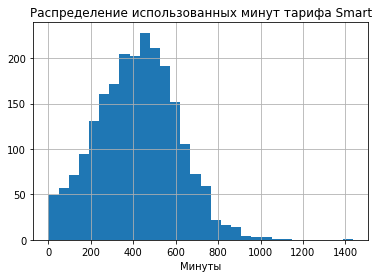

In [59]:
smart.hist('minutes_used', bins=30)
plt.title('Распределение использованных минут тарифа Smart')
plt.xlabel('Минуты')
plt.show()

Пользователи тарифа Smart чаще всего проговаривают от 290 до 550 минут в месяц. В среднем они тратят 419 минут в месяц. 

In [60]:
# Дисперсия и стандартное отклонение использованных минут тарифа ultra
variance_minutes_ultra = np.var(ultra['minutes_used'], ddof=1)
variance_minutes_ultra

94203.41839614812

In [61]:
standard_deviation_minutes_ultra = np.sqrt(variance_minutes_ultra)
standard_deviation_minutes_ultra

306.92575388218586

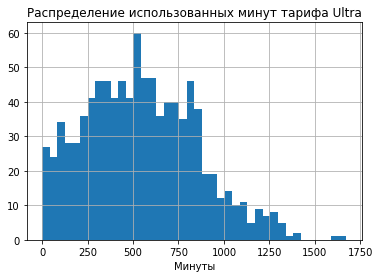

In [62]:
ultra.hist('minutes_used', bins=40)
plt.title('Распределение использованных минут тарифа Ultra')
plt.xlabel('Минуты')
plt.show()

Пользователи тарифа Ultra в среднем используют 545 минут в месяц, значение медианы при этом на 17 минут меньше. График немного скошен вправо. Среди пользователей тарифа немало тех, кто говорит больше медианного значения. 

In [63]:
# СООБЩЕНИЯ
df.pivot_table(index='tariff', values='count_message', aggfunc=['count', 'sum','mean', 'median'])

,count,sum,mean,median
,count_message,count_message,count_message,count_message
tariff,,,,
smart,1922,74413.0,38.716441,34.0
ultra,795,48623.0,61.161006,51.0


In [64]:
# Дисперсия сообщений и стандартное отклонение сообщений тарифа smart
variance_messages_smart = np.var(smart['count_message'], ddof=1)
variance_messages_smart

717.5942011753547

In [65]:
standard_deviation_messages_smart = np.std(smart['count_message'], ddof=1)
standard_deviation_messages_smart

26.787948804926344

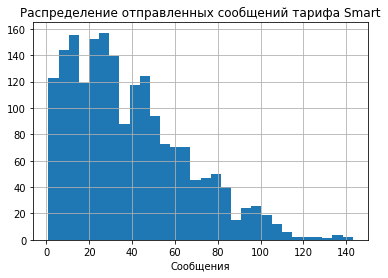

In [66]:
smart.hist('count_message', bins=30)
plt.title('Распределение отправленных сообщений тарифа Smart')
plt.xlabel('Сообщения')
plt.show()

In [67]:
# Дисперсия сообщений и стандартное отклонение сообщений тарифа ultra
variance_messages_ultra = np.var(ultra['count_message'], ddof=1)
variance_messages_ultra

2109.6591828651995

In [68]:
standard_deviation_messages_ultra = np.std(ultra['count_message'], ddof=1)
standard_deviation_messages_ultra

45.93102636416042

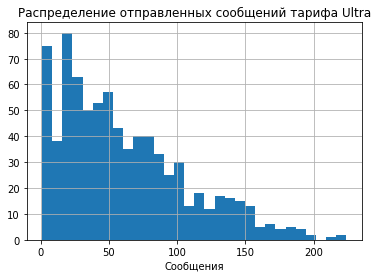

In [69]:
ultra.hist('count_message', bins=30)
plt.title('Распределение отправленных сообщений тарифа Ultra')
plt.xlabel('Сообщения')
plt.show()

In [70]:
ultra['count_message'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: count_message, dtype: float64

Пользователеи тарифа Smart в среднем отправляют 38 сообщений в месяц, медианное количество - 34. Пользователи тарифа Ultra в среднем используют 61 сообщение в месяц, медиана для них - 51 сообщение. Графики для обоих тарифов явно скошены вправо, значит бОльшая часть пользователей укладывается в средние значения, но и достаточно тех кто пользуется сообщениями чаще.

In [71]:
# ИНТЕРНЕТ
df.pivot_table(index='tariff', values='mb_used', aggfunc=['count', 'sum','mean', 'median', 'var', 'std'])

,count,sum,mean,median,var,std
,mb_used,mb_used,mb_used,mb_used,mb_used,mb_used
tariff,,,,,,
smart,2228,36174861.0,16236.472621,16532.0,3.444310e+07,5868.824472
ultra,975,19194598.0,19686.767179,19411.0,9.904344e+07,9952.057054


In [72]:
# Дисперсия и стандартное отклонение MB тарифа smart
variance_internet_smart = np.var(smart['mb_used'], ddof=1)
variance_internet_smart

34443100.68133359

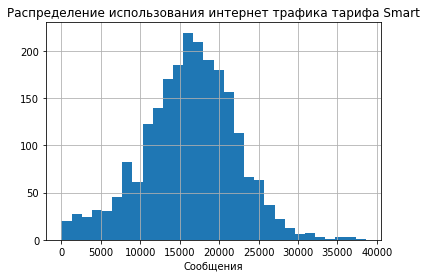

In [73]:
smart.hist('mb_used', bins=30)
plt.title('Распределение использования интернет трафика тарифа Smart')
plt.xlabel('Сообщения')
plt.show()

В среднем пользователи тарифа Smart "не укладывается" в отведенные 15360 Мб, и тратят по-среднему 16,5 тыс. Мб в месяц. Но при этом расход мегабайт у половины всех пользователей не превышает 16,2тыс. У пользователей Ultra среднее и медиана тоже примерно равны. Они в среднем используют 19,6 тыс. Мб. У половины клиентов расход не превышает 19,4 тыс. Мб,а у половины он больше.

In [74]:
# Дисперсия и стандартное отклонение MB тарифа ultra
variance_internet_ultra = np.var(ultra['mb_used'], ddof=1)
variance_internet_ultra

99043439.60795662

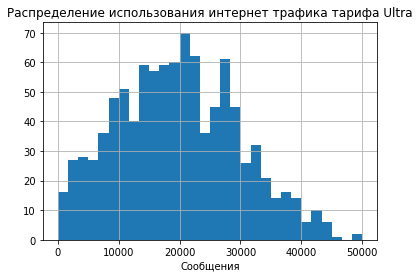

In [75]:
ultra.hist('mb_used', bins=30, range=(0, 50000))
plt.title('Распределение использования интернет трафика тарифа Ultra')
plt.xlabel('Сообщения')
plt.show()

Пользователи тарифа Smart в большинстве случаев не превышают предоставленный лимит в 550 минут разговора в месяц. В среднем они тратят 419 минут в месяц. Редко превышает фактический расход и лимит в 50 сообщений, средннее - 38 сообщений в месяц, медианное количество - 34.А вот в выделенные по тарифу мегабайты средний пользователь тарифа Smart "не укладывается" и тратит 16,5 тыс. Мб в месяц. Но при этом расход мегабайт у половины всех пользователей не превышает 16,2тыс.


Половина всех клиентов на Ultra тратит не более 528 предоставленных минут разговора. Среди пользователей тарифа немало и тех, кто говорит больше медианного значения, но никто не говорит больше установленных 1950минут.
До отправки возможной 1000 сообщений в месяц им тоже очень далеко, в среднем клиенты используют 61 сообщение в месяц, медиана для них - 51 сообщение.
По расходу интернет-трафика среднее и медиана для клиентов Ultra примерно равны. Они в среднем используют 19,6 тыс. Мб. У половины клиентов расход не превышает 19,4 тыс. Мб,а у половины он больше.

### Шаг 4. Проверьте гипотезы <a name="fourth-bullet"></a>

Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. 
Так как нулевая гипотеза всегда формулируется исходя из равенства средних, сформулируем ее как: 
"Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны". Альтернативная гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

In [76]:
alpha = 0.05
results = st.ttest_ind(
    smart['revenue'], 
    ultra['revenue'])
 
print('p-значение:', results.pvalue)
 
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.172655564462924e-190
Отвергаем нулевую гипотезу


Нулевая гипотеза: средняя выручка пользователей из Москвы и пользователей из других регионов равны. Альтернативная гипотеза: средняя выручка пользователей из Москвы и пользователей из других регионов различаются.

In [77]:
users_moscow = df.query('city == "Москва"')
users_other = df.query('city != "Москва"')

In [78]:
alpha = 0.05
results = st.ttest_ind(
    users_moscow['revenue'], 
    users_other['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


В результате проверки мы отвергли нулевую гипотезу о том, что средняя выручка тарифов Смарт и Ультра равны, значит  средние выручки тарифов отличаются. 

Нулевую гипотезу о том, что средняя выручка пользователей из Москвы и пользователей из других регионов равны, отвергнуть не получилось, потому нельзя утверждать, что средние выручки различаются.

### Шаг 5. Общий вывод <a name="fifth-bullet"></a>

Представленная выборка на 70% состоит из пользователей тарифа Smart и на 30% из пользователей тарифа Ultra.

Пользователи тарифа Smart в большинстве случаев не превышают предоставленный лимит в 550 минут разговора в месяц, но все же такое случается. В среднем они тратят 419 минут в месяц. Редко превышает фактический расход и лимит в 50 сообщений, половина пользователей не превышает 34 сообщений в месяц, но в другой половине клиентов их количество может доходить до 140 шт, это 270 руб. сверх тарифа.А вот в выделенные по тарифу мегабайты средний пользователь тарифа Smart "не укладывается" и тратит 16,5 тыс. Мб в месяц. Но при этом половина всех пользователей использует не более 16,2тыс., но даже при среднем потреблении трафика, получается 1 Гб сверх лимита стоимостью 200руб.


Половина всех клиентов на Ultra тратит не более 528 предоставленных минут разговора. Среди пользователей тарифа немало и тех, кто говорит больше медианного значения, но никто не говорит больше установленных 1950минут.
До отправки возможной 1000 сообщений в месяц им тоже очень далеко, в среднем клиенты используют 61 сообщение в месяц, медиана для них - 51 сообщение.
По расходу интернет-трафика среднее и медиана для клиентов Ultra примерно равны. Они в среднем используют 19,6 тыс. Мб. У половины клиентов расход не превышает 19,4 тыс. Мб., а превышают установленный лимит в 30720 Мб не многие.